### import modules

In [1]:
import h5py, os, nilearn
import matplotlib.pyplot as plt
import numpy as np
#from nilearn import input_data, datasets, plotting
from nltools.data import Brain_Data
from nltools.mask import expand_mask, roi_to_brain
from nilearn.plotting import view_img_on_surf, view_img
from nltools.stats import isc, threshold, fdr
from tqdm import tqdm
import pandas as pd
import re

import warnings
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)#, message="All-NaN slice encountered")


### run isc over all individual files

In [4]:
n_iter = 1

folder_paths = ['../data/00_raw_fmri/',
                '../data/00_raw_fmri/',
                '../data/00_raw_fmri/',
                '../data/00_raw_fmri/',
                '../data/00_raw_fmri/',
                '../data/00_raw_fmri/']
                
current_folder = folder_paths[0]
print(current_folder)
files = sorted(os.listdir(current_folder))  # Sorts alphabetically
files = [f for f in files if re.match(r"task[\s_\-].*", f)]

    
current_index = 0
file_path = current_folder + files[current_index]
print(file_path)
data = np.load(file_path)
        
isc_results = []
for curr_roi in tqdm(range(1000)):
                    data_roi_df = pd.DataFrame( data[:,:,curr_roi].T)
                    stats_boot = isc(data_roi_df, method='phase_randomize', n_samples=n_iter, return_null=True)
                    isc_results.append(stats_boot['isc'])
        
        #isc_result_file = '../data/01_isc_results/' + "isc_" + files[current_index][:-4] + '.npy'
        #np.save(isc_result_file, isc_results)
stats_boot

../data/00_raw_fmri/
../data/00_raw_fmri/task-s01e01a.npy


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:36<00:00, 27.53it/s]


{'isc': 0.0621524715343455,
 'p': 0.5,
 'ci': (0.0033378793274033147, 0.0033378793274033147),
 'null_distribution': [0.0033378793274033147]}

[0.0033378793274033147]

In [62]:
n_iter = 1

folder_paths = ['../data/00_raw_fmri/season01/',
                '../data/00_raw_fmri/season02/',
                '../data/00_raw_fmri/season03/',
                '../data/00_raw_fmri/season04/',
                '../data/00_raw_fmri/season05/',
                '../data/00_raw_fmri/season06/']
                
for current_folder in folder_paths:
    print(current_folder)
    files = sorted(os.listdir(current_folder))  # Sorts alphabetically
    
    for current_index in range(len(files)):
        file_path = current_folder + files[current_index]
        data = np.load(file_path)
        
        isc_results = []
        for curr_roi in tqdm(range(1000)):
                    data_roi_df = pd.DataFrame( data[:,:,curr_roi].T)
                    stats_boot = isc(data_roi_df, method='phase_randomize', n_samples=n_iter, return_null=False)
                    isc_results.append(stats_boot['isc'])
        
        isc_result_file = '../data/01_isc_results/' + "isc_" + files[current_index][:-4] + '.npy'
        np.save(isc_result_file, isc_results)

../data/00_raw_fmri/season01/


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.82it/s]


../data/00_raw_fmri/season02/


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 61.19it/s]


../data/00_raw_fmri/season03/


100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:16<00:00, 60.98it/s]


../data/00_raw_fmri/season04/


 95%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████▏     | 950/1000 [00:16<00:00, 56.43it/s]


KeyboardInterrupt: 

In [63]:
file_path

'../data/00_raw_fmri/season04/task-s04e05b.npy'

In [64]:
data.shape

(4, 471, 1000)

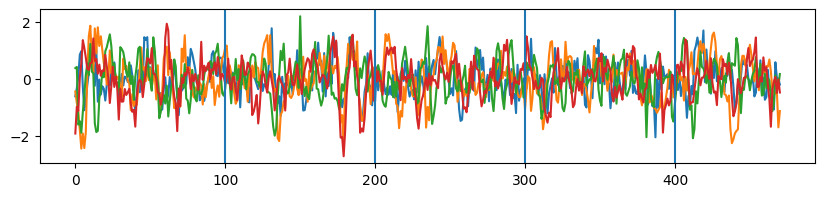

In [76]:
plt.figure(figsize= (10,2))
plt.plot(data[:, :, 920].T);
plt.axvline(100)
plt.axvline(200)
plt.axvline(300)
plt.axvline(400)